<a href="https://colab.research.google.com/github/MAboElFottouh/Predicting-disaster-tweets/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive  #access to google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import nltk 
import re #to edit in tweet
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation

Load the dataset

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/train.csv")
test = pd.read_csv("/content/drive/MyDrive/test.csv") 

Check head and info of the data

In [ ]:
train.head() #look into top few rows and columns in the dataset

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
test.head() #look into top few rows and columns in the dataset

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


Is there a missing data

In [ ]:
train.isna().sum() #check null values

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [ ]:
test.isna().sum()#check null values

id             0
keyword       26
location    1105
text           0
dtype: int64

How many data in each class

In [ ]:
print('shape of train data : ',train.shape) #Number of rows and columns train data set 
print('shape of test  data : ',test.shape)#Number of rows and columns test data set

shape of train data :  (7613, 5)
shape of test  data :  (3263, 4)


Get the top 15 locations of the data

In [ ]:
train['location'].value_counts()[:15] #view 0 to 14 

USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Washington, DC      21
Kenya               20
Worldwide           19
Australia           18
Chicago, IL         18
Name: location, dtype: int64

Get the top 15 keyword in the data

In [ ]:
train['keyword'].value_counts()[:15] #view 0 to 14 

fatalities     45
deluge         42
armageddon     42
sinking        41
damage         41
harm           41
body%20bags    41
outbreak       40
evacuate       40
fear           40
collided       40
siren          40
twister        40
windstorm      40
sinkhole       39
Name: keyword, dtype: int64

drop id ,location ,keyword columns

In [ ]:
train.drop('location',axis=1, inplace= True)   #Drop useful columns
train.drop('keyword',axis=1, inplace= True)
train.drop('id',axis=1, inplace= True)

In [ ]:
test.drop('location',axis=1, inplace= True) #Drop useful columns
test.drop('keyword',axis=1, inplace= True)
test.drop('id',axis=1, inplace= True)

In [ ]:
target = train.drop('text',axis=1) # split column target to work in text only now 

In [ ]:
train.drop('target',axis=1, inplace= True)

In [ ]:
from nltk.corpus import stopwords  #download stop words nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
train['text'][1].split() #view sample

['Forest', 'fire', 'near', 'La', 'Ronge', 'Sask.', 'Canada']

What are the most common words?

In [ ]:
most_stop =[]
most_word =[]
for text in train['text']:
  for word in text.split():  #split tweet to single word 
    if word not in stop_words: #chack is stop word or not 
      most_word.append(word)
    else :
      most_stop.append(word)


In [ ]:
#creat function to get Most duplicate value in list 
import statistics
from statistics import mode
 
def most_common(List):
    return(mode(List))


print('the most common word : ({})'.format(most_common(most_word)))

the most common word : (I)


 What are the most common stop words

In [ ]:
print('the most common stop word : ({})'.format(most_common(most_stop)))

the most common stop word : (the)


Check Balancing

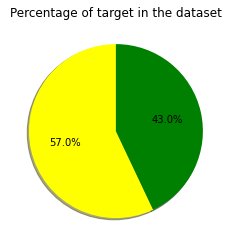

In [ ]:
#Check Balancing in target column 
from matplotlib import pyplot as plt
sizes = target.value_counts(sort = True)
colors = ["yellow","green"] 
plt.pie(sizes, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,) #show Balancing
plt.title('Percentage of target in the dataset')
plt.show()

In [ ]:
from nltk.stem import WordNetLemmatizer #Download his library to convert the word to its origin
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
#create function to Removing useful words and returning the speech to its original

def clean_tweet(tweet):


  clean_tweets = []
  le=WordNetLemmatizer()


  tweet = re.sub(r'(@|#)[A-Za-z0-9_]*','',tweet) #Remove Mentions and hashrag
  tweet = re.sub(r'https?:\/\/\S+','',tweet) #Remove Link
  tweet = re.sub('\W',' ',tweet) #Remove pnuc
  tweet = re.sub('^\s+','',tweet) #Remove space
  tweet = re.sub('\s+$','',tweet) #Remove space
  tweet = re.sub('\s\d+\s','',tweet) #Remove digit
  

#returning the speech to its original
  clean_tweet = [le.lemmatize(word.lower()) for word in tweet.split() if (word.lower() not in stop_words)   ] 





  return clean_tweet


In [ ]:
clean_tweets = []
for tweett in train['text']:
  clean_tweets.append(clean_tweet(tweett))

In [ ]:
# Tokenizer the Tweets
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_tweets)
tweets = tokenizer.texts_to_sequences(clean_tweets)

Padding

In [ ]:
#Padding tweet to make all same lenght
from tensorflow.keras.preprocessing.sequence import pad_sequences
tweets = pad_sequences(tweets)

In [ ]:
len(tweets[1])

23

In [ ]:
#Split Data
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(tweets,target)

# **LSTM**

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout,Embedding,Bidirectional

model = Sequential()

model.add(Embedding(len(tokenizer.word_index)+1,10,input_length=len(tweets[1]))) #len(tokenizer.word_index) + B and input length = len any tweet all same after padding 
model.add(Bidirectional(LSTM(5))) #LSTM layer
model.add(Dense(32,activation='relu')) #activation function 
model.add(Dropout(0.5)) #Drop layer
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid')) #output layer useing sigmoid becasu i need all to class 

model.compile(loss="binary_crossentropy",optimizer='RMSprop',metrics=['accuracy'])
model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_36 (Embedding)    (None, 23, 10)            127280    
                                                                 
 bidirectional_36 (Bidirecti  (None, 10)               640       
 onal)                                                           
                                                                 
 dense_119 (Dense)           (None, 32)                352       
                                                                 
 dropout_59 (Dropout)        (None, 32)                0         
                                                                 
 dense_120 (Dense)           (None, 32)                1056      
                                                                 
 dropout_60 (Dropout)        (None, 32)                0         
                                                     

In [ ]:
history = model.fit(train_x,train_y,validation_split=0.1,verbose=1,epochs=3) 


Epoch 1/3
161/161 [==============================] - 9s 24ms/step - loss: 0.6769 - accuracy: 0.5689 - val_loss: 0.6503 - val_accuracy: 0.5762
Epoch 2/3
161/161 [==============================] - 3s 18ms/step - loss: 0.5808 - accuracy: 0.7096 - val_loss: 0.5226 - val_accuracy: 0.7793
Epoch 3/3
161/161 [==============================] - 3s 17ms/step - loss: 0.4442 - accuracy: 0.8276 - val_loss: 0.4623 - val_accuracy: 0.7846


Text(0.5, 0, 'Epochs')

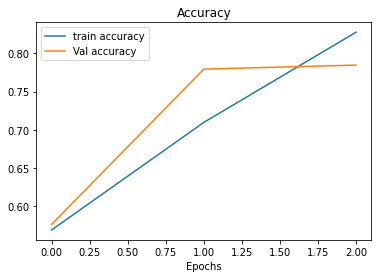

In [ ]:
#show train accuracy with Val accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train accuracy','Val accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')

# stop in epoch 7

Text(0.5, 0, 'epochs')

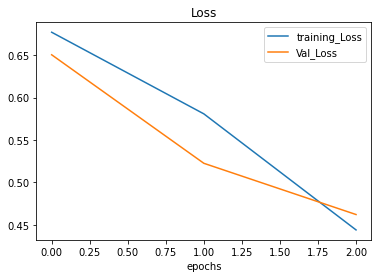

In [ ]:
#show training Loss with Val Loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training_Loss','Val_Loss'])
plt.title('Loss')
plt.xlabel('epochs')

In [ ]:
model.evaluate(test_x,test_y,verbose=2) #evaluate model with test data 

60/60 - 0s - loss: 0.4586 - accuracy: 0.8015 - 245ms/epoch - 4ms/step


[0.4585820734500885, 0.8014705777168274]

# save model

In [ ]:
#save model
from keras.models import load_model
model.save("model.h5")

# load model 

In [ ]:
#load model 
loaded_model = load_model("/content/drive/MyDrive/model.h5")
loss, accuracy = loaded_model.evaluate(test_x, test_y)

60/60 [==============================] - 2s 6ms/step - loss: 0.4586 - accuracy: 0.8015
